<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20210415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
eval("1+2")

3

In [2]:
x = 1
y = 1
eval('x+y')

2

In [3]:
eval("print('Hi~')")

Hi~


In [6]:
expression = input("Enter an expression ")
eval(expression)

Enter an expression 15


15

In [7]:
students = [('홍길동', 3.9, 20160303),
            ('김철수', 3.0, 20160302),
            ('최무선', 4.3, 20160301)]

sorted(students, key = lambda student: student[2])

[('최무선', 4.3, 20160301), ('김철수', 3.0, 20160302), ('홍길동', 3.9, 20160303)]

In [8]:
sorted(students, key = lambda student: student[0])

[('김철수', 3.0, 20160302), ('최무선', 4.3, 20160301), ('홍길동', 3.9, 20160303)]

In [10]:
sorted(students, key = lambda student: student[2], reverse = True)

[('홍길동', 3.9, 20160303), ('김철수', 3.0, 20160302), ('최무선', 4.3, 20160301)]

In [11]:
import random
myList = [[x] for x in range(10)]
random.shuffle(myList)
myList

[[0], [6], [1], [9], [5], [2], [3], [4], [8], [7]]

In [13]:
for i in range(3):
  print(random.randrange(0, 101, 3))

18
51
24


In [17]:
print(random.randint(1, 6))

2


In [18]:
print(random.randint(1, 6))

1


In [20]:
print(random.random()*100)

97.72919366312934


In [22]:
myList = ["red", "green", "blue"]
random.choice(myList)

'green'

In [14]:
import time
time.asctime()

'Thu Apr 15 11:13:42 2021'

In [15]:
time.localtime()

time.struct_time(tm_year=2021, tm_mon=4, tm_mday=15, tm_hour=11, tm_min=13, tm_sec=59, tm_wday=3, tm_yday=105, tm_isdst=0)

In [16]:
import calendar

cal = calendar.month(2021, 4)
print(cal)

     April 2021
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30



Mounted at /content/gdrive
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


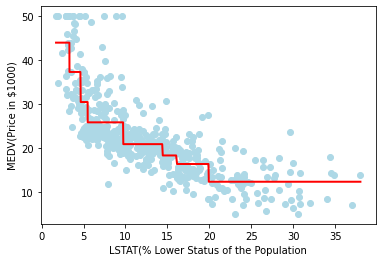

In [26]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Data/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
              'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(df.head())
X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)

sort_idx = X.flatten().argsort()
plt.scatter(X[sort_idx], y[sort_idx], c='lightblue')
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='red', linewidth=2)
plt.xlabel('LSTAT(% Lower Status of the Population')
plt.ylabel('MEDV(Price in $1000)')
plt.show()

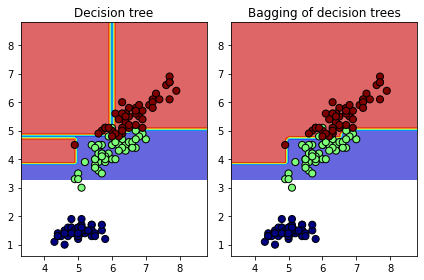

In [28]:
# bagging
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Decision tree")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Bagging of decision trees")
plt.tight_layout()
plt.show()